# Solution for Homework 10

In this assignment, we're working with SQLite3. We'll also be working with the SAKILA database. This database contains transactions from a fictional chain of DVD rental stores. It was created in 2006 by Mike Hillyer and has since been used as an example database in many textbooks and on several SQL "playground" websites. 

Download the file "sqlite-sakila.db" from Canvas. Save the file in the same directory where you have saved this notebook (or in some other directory for which you know the path). You can find an ER-schema of the Sakila database on Canvas. Look at the ER-schema to understand the structure of the Sakila database. 

For all problems below, if you are not able to write `SQLite3` code to obtain results, try to write at least the corresponding SQL code statement. If you can't run the code, you won't be able to get answers, of course, but you could at least get partial credit for your SQL statements. 

**Example Question:** How many different languages can you find in the `language` table? 

**Example Perfect Answer:**

In [1]:
import sqlite3
import pandas as pd

def run_query(q):
    with sqlite3.connect("sqlite-sakila.db") as con:
            # Change the path to where YOU have saved the sqlite-sakila.db file
            # IF you have saved the file in the same folder as this notebook, the above should work without changes
        return pd.read_sql(q, con)

run_query("SELECT * FROM language")

,language_id,name,last_update
0,1,English,2021-03-06 15:51:48
1,2,Italian,2021-03-06 15:51:48
2,3,Japanese,2021-03-06 15:51:48
3,4,Mandarin,2021-03-06 15:51:48
4,5,French,2021-03-06 15:51:48
5,6,German,2021-03-06 15:51:48


Answer: There are six languages (English, Italian, Japanese, Mandarin, French, and German). 

**Example Answer (for partial credit):**

SQL code: 
```SELECT * FROM language;``` 

Then count how many entries are in that table. 

### Problem 1

(a) Find the SQL statement that was used to create the `rental` table. Print the SQL statement to the console. 
Note that the `\n` in the SQL statement are line breaks in Python. Your print statement should be nicely formatted (each variable in a new row) and there should be no more `\n` visible in your print statement. 

In [2]:
print(run_query("SELECT sql FROM sqlite_schema WHERE name =='rental'").values[0][0])

CREATE TABLE rental (
  rental_id INT NOT NULL,
  rental_date TIMESTAMP NOT NULL,
  inventory_id INT  NOT NULL,
  customer_id INT  NOT NULL,
  return_date TIMESTAMP DEFAULT NULL,
  staff_id SMALLINT  NOT NULL,
  last_update TIMESTAMP NOT NULL,
  PRIMARY KEY (rental_id),
  CONSTRAINT fk_rental_staff FOREIGN KEY (staff_id) REFERENCES staff (staff_id) ,
  CONSTRAINT fk_rental_inventory FOREIGN KEY (inventory_id) REFERENCES inventory (inventory_id) ,
  CONSTRAINT fk_rental_customer FOREIGN KEY (customer_id) REFERENCES customer (customer_id)
)


(b) Describe the `rental` table:
* How many variable columns does that table have (according to the SQL command)? 
* What is the primary key of the `Rental` table? 
* How many foreign keys are there? Which tables do they link to? 
* What are the variable types of the variables `rental_date` and `return_date`? 
* What does the `NOT NULL` and `DEFAULT NULL` statements mean, respectively, that appear after `rental_date` and `return_date`? 

SQL Code: ```SELECT sql FROM sqlite_schema WHERE name =='rental';```

* How many variable columns does that table have (according to the SQL command)? 

Answer: 7 (even though the ER schema only shows 6) The 7th variable is `last_update`. 
* What is the primary key of the `Rental` table? 

Answer: The primary key is `rental_id`.
* How many foreign keys are there? Which tables do they link to? 

Answer: Three foreign keys: `staff_id` links to the staff table, `inventory_id` links to the inventory table, and `customer_id` links to the customer table. 
* What are the variable types of the variables `rental_date` and `return_date`?

  Answer: TIMESTAMP
* What does the `NOT NULL` and `DEFAULT NULL` statements mean, respectively, that appear after `rental_date` and `return_date`? 

Answer: When data is entered into the table, it's ok to leave the `return_date` information (which may be unknown at the time of checkout) blank. 

### Problem 2

What are the variable types of the variables `staff_id`, and `rental_id` in the `rental` table, respectively? Why is it useful or necessary to use different variable types for these three variables? Why can't they both be stored as tinyint's for example? 

The variable types of `staff_id` and `rental_id` are smallint, and int (both unsigned). They differ by how large the integer values can be that can be stored under these variables. There are only two different "employees" in this fake database (staff_id 1 and 2) and hence we could get away with tiny integers. However, there are a little over 16k rental transactions. While the latter would have (just barely) fitted in mediumint format, the int-format gives the database room to "grow" and record future transactions. 

### Problem 3

The primary key of the `actor` table (which is `actor_id`) does not auto-increment. There are currently 200 actors in the `actor` table. Modify the `actor` table to list your own first and last name under `actor_id` 201. Use `date('now')` to enter the current time and date. 

Then print out all rows of the actor table for actors with the same last name as yours. 

In [3]:
con = sqlite3.connect("sqlite-sakila.db")
cur = con.cursor()
cur.execute("DELETE FROM actor WHERE (actor_id==201)") 
        # adding in this line, so that you can try out code more than once during development

cur.execute("INSERT INTO actor (actor_id, first_name, last_name, last_update) \
    VALUES (201, 'MARTINA', 'BREMER', date('now'))")
con.commit()

display(pd.read_sql("SELECT * FROM actor WHERE last_name ='BREMER'", con))
# Note that you should be using your own name instead of mine...

con.close()

,actor_id,first_name,last_name,last_update
0,201,MARTINA,BREMER,2023-04-19 19:37:44


**Optional:** If you can't get your SQLite3 code to work, leave the SQL statement(s) you would use for the above tasks below. 

SQL code:

```
INSERT INTO actor  
    (actor_id, first_name, last_name, last_update) 
    VALUES (201, 'MARTINA', 'BREMER', date('now'));

SELECT * FROM actor WHERE last_name = 'BREMER;
```


### Problem 4

(a) Use Python to extract the columns `staff_id`, `amount`, and `payment_date` from the `Payment` table. 
Store these data in a Pandas data frame and display the data frame to the console for the grader to see.

In [4]:
df = run_query("SELECT staff_id, amount, payment_date FROM Payment ORDER BY payment_date")
display(df)

,staff_id,amount,payment_date
0,1,2.99,2005-05-24 22:53:30.000
1,2,2.99,2005-05-24 22:54:33.000
2,2,3.99,2005-05-24 23:03:39.000
3,1,4.99,2005-05-24 23:04:41.000
4,1,6.99,2005-05-24 23:05:21.000
...,...,...,...
16044,1,0.99,2006-02-14 15:16:03.000
16045,2,2.99,2006-02-14 15:16:03.000
16046,2,0.99,2006-02-14 15:16:03.000
16047,1,0.99,2006-02-14 15:16:03.000


**Optional:** If you can't get your SQLite3 code to work, leave the SQL statement(s) you would use for the above tasks below. 

```
SELECT staff_id, amount, payment_date FROM Payment ORDER BY payment_date;
```

(b) For the dataframe created in (a), take the date values and use either string formating or the [`pd.DatetimeIndex()` method](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)  to extract just the month and the year of the transaction. Store both in separate columns of the data frame. 

Use groupby to find the total monthly transaction amounts, separately for each employee. 

Use Matplotlib to create a line-plot that shows the total transaction amount per employee per month as a function of time. Label the x-axis with the appropriate month/year combination and include one line per employee. Include a legend to indicate which line belongs to which employee. You can find an image on Canvas with an example of what your graph should look like. 

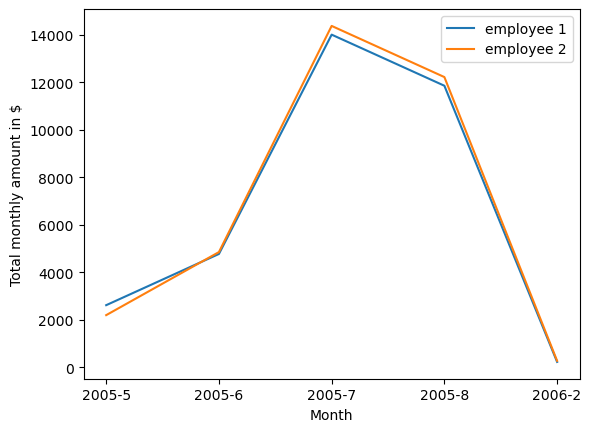

In [5]:
import matplotlib.pyplot as plt

df_new = df.copy()

df_new['Month'] = pd.DatetimeIndex(df_new['payment_date']).month
df_new['Year'] = pd.DatetimeIndex(df_new['payment_date']).year

df_new.drop(['payment_date'], axis = 1)

df_new = df_new.groupby(['Year', 'Month', 'staff_id']).sum().unstack(-1)
df_new.reset_index(inplace = True)

df_new['date'] = df_new.Year.astype(str) + "-" + df_new.Month.astype(str)

fig, ax = plt.subplots()
for staff in range(1,3):
    ax.plot(df_new.date, df_new.amount[staff], label = "employee " + str(staff))
    
ax.set_ylabel("Total monthly amount in \$")
ax.set_xlabel("Month")
ax.legend(); 

#fig.savefig('Sakila_lineplot.png')